In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import warnings
warnings.filterwarnings("ignore")

from pydataset import data

import env
import wrangle

# Acquire the Data

### 1. Load the tips dataset. 

In [2]:
df = data('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [4]:
df.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [5]:
df.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [6]:
df.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [7]:
df.value_counts()

total_bill  tip    sex     smoker  day   time    size
13.00       2.00   Female  Yes     Thur  Lunch   2       2
50.81       10.00  Male    Yes     Sat   Dinner  3       1
14.52       2.00   Female  No      Thur  Lunch   2       1
15.69       1.50   Male    Yes     Sun   Dinner  2       1
15.53       3.00   Male    Yes     Sat   Dinner  2       1
                                                        ..
20.76       2.24   Male    No      Sun   Dinner  2       1
20.69       5.00   Male    No      Sun   Dinner  5       1
            2.45   Female  No      Sat   Dinner  4       1
20.65       3.35   Male    No      Sat   Dinner  3       1
3.07        1.00   Female  Yes     Sat   Dinner  1       1
Length: 243, dtype: int64

In [8]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<AxesSubplot:>

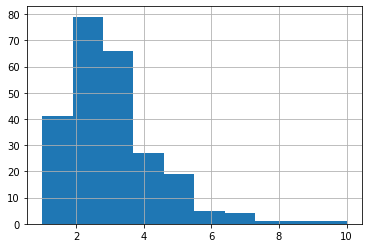

In [9]:
df.tip.hist()

<AxesSubplot:>

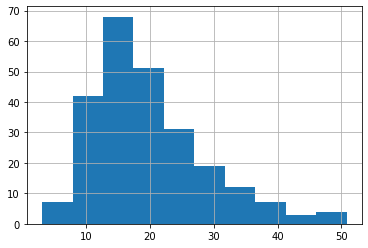

In [10]:
df.total_bill.hist()

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

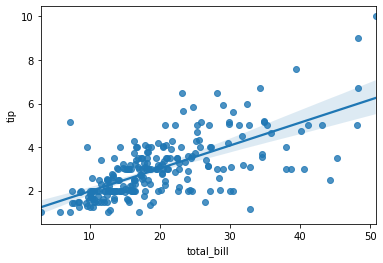

In [11]:
sns.regplot(y='tip', x = 'total_bill', data = df)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

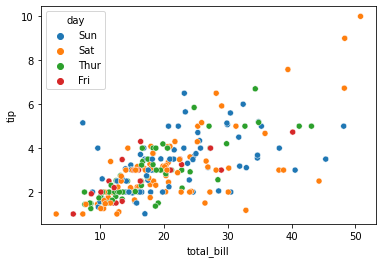

In [12]:
sns.scatterplot(y = 'tip', x = 'total_bill', data = df, hue = 'day')

# Prep the Data

- 1a. Create a column named `tip_percentage`. This should be the tip amount divided by the total bill.
- 1b. Create a column named `price_per_person`. This should be the total bill divided by the party size.

In [13]:
df['tip_percentage'] = (df.tip / df.total_bill)

In [14]:
df['price_per_person'] = (df.total_bill / df.size)
df

,total_bill,tip,sex,smoker,day,time,size,tip_percentage,price_per_person
1,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,0.008704
2,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,0.005297
3,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,0.010763
4,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,0.012131
5,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,0.012597
...,...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,0.203927,0.014872
241,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584,0.013924
242,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222,0.011614
243,17.82,1.75,Male,No,Sat,Dinner,2,0.098204,0.009129


Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount? The tip percentage?

I think `total_bill` as a continuous variable would have an impact on tips, as well as party size, time, and obviously, `tip_percentage` being the most prominent. However, I think using `tip_percentage` as an independent variable is possible a bad idea, since it is derived from the target variable.

In [15]:
df.dtypes

total_bill          float64
tip                 float64
sex                  object
smoker               object
day                  object
time                 object
size                  int64
tip_percentage      float64
price_per_person    float64
dtype: object

In [16]:
# Creating dummy variables of the object columns.

mask = np.array(df.dtypes == "object")
mask

array([False, False,  True,  True,  True,  True, False, False, False])

In [17]:
obj_df = df.iloc[:, mask]
obj_df.columns

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

In [18]:
# Create a new dummy dataframe:

dummy_df = pd.get_dummies(obj_df, dummy_na = False, drop_first = True)
dummy_df

,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
1,0,0,0,1,0,0
2,1,0,0,1,0,0
3,1,0,0,1,0,0
4,1,0,0,1,0,0
5,0,0,0,1,0,0
...,...,...,...,...,...,...
240,1,0,1,0,0,0
241,0,1,1,0,0,0
242,1,1,1,0,0,0
243,1,0,1,0,0,0


In [41]:
df = pd.concat([df, dummy_df], axis = 1)
df.drop(columns = obj_df.columns, inplace = True)
df.head()

,total_bill,tip,size,tip_percentage,price_per_person,sex_male,smoker_yes,day_sat,day_sun,day_thur,time_lunch,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
1,16.99,1.01,2,0.059447,0.008704,0,0,0,1,0,0,0,0,0,1,0,0
2,10.34,1.66,3,0.160542,0.005297,1,0,0,1,0,0,1,0,0,1,0,0
3,21.01,3.50,3,0.166587,0.010763,1,0,0,1,0,0,1,0,0,1,0,0
4,23.68,3.31,2,0.139780,0.012131,1,0,0,1,0,0,1,0,0,1,0,0
5,24.59,3.61,4,0.146808,0.012597,0,0,0,1,0,0,0,0,0,1,0,0


In [42]:
# Making the columns indexes more pythonese (all lower case).

df.columns = map(str.lower, df.columns)
df.head()

,total_bill,tip,size,tip_percentage,price_per_person,sex_male,smoker_yes,day_sat,day_sun,day_thur,time_lunch,sex_male,smoker_yes,day_sat,day_sun,day_thur,time_lunch
1,16.99,1.01,2,0.059447,0.008704,0,0,0,1,0,0,0,0,0,1,0,0
2,10.34,1.66,3,0.160542,0.005297,1,0,0,1,0,0,1,0,0,1,0,0
3,21.01,3.50,3,0.166587,0.010763,1,0,0,1,0,0,1,0,0,1,0,0
4,23.68,3.31,2,0.139780,0.012131,1,0,0,1,0,0,1,0,0,1,0,0
5,24.59,3.61,4,0.146808,0.012597,0,0,0,1,0,0,0,0,0,1,0,0


In [43]:
def split_data(df):
    from sklearn.model_selection import train_test_split
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)

    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
    return train, validate, test

In [44]:
train, validate, test = split_data(df)

In [45]:
if train.shape[0] + validate.shape[0] + test.shape[0] == df.shape[0]:
    print("The shapes match; your split datasets are good to go!")
else:
    print("The shapes do not match, there is a problem with your split.")

The shapes match; your split datasets are good to go!


### **1d:** Use all the other numeric features to predict tip amount. Use select k best and recursive feature elimination to select the top 2 features. What are they?

#### KBest
- Split into X and y dataframes
- y == `tip`

In [46]:
# x df's are all cols except tip
X_train = train.drop(columns=['tip'])
X_validate = validate.drop(columns=['tip'])
X_test = test.drop(columns=['tip'])

# y df's are just tip, the dependent variable
y_train = train[['tip']]
y_validate = validate[['tip']]
y_test = test[['tip']]

In [47]:
# I need to scale the train data before I split it up into X and y. Since I have dummy columns that are 0s and 1s, probably should use the MinMaxScaler

In [52]:
X_train.columns

Index(['total_bill', 'size', 'tip_percentage', 'price_per_person', 'sex_male',
       'smoker_yes', 'day_sat', 'day_sun', 'day_thur', 'time_lunch',
       'sex_male', 'smoker_yes', 'day_sat', 'day_sun', 'day_thur',
       'time_lunch'],
      dtype='object')

In [53]:
scaler = MinMaxScaler(copy = True).fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

In [57]:
# Now creating a dataframe using the above numpy arrays:


X_train_scaled = pd.DataFrame(X_train_scaled, 
                              columns=X_train.columns.values).\
                            set_index([X_train.index.values])

X_validate_scaled = pd.DataFrame(X_validate_scaled, 
                                columns=X_validate.columns.values).\
                            set_index([X_validate.index.values])

X_test_scaled = pd.DataFrame(X_test_scaled, 
                                columns=X_test.columns.values).\
                            set_index([X_test.index.values])

In [ ]:
# Finally, split the data: